<a href="https://colab.research.google.com/github/finesketch/deep_learning/blob/main/3.%20Natural%20Language%20Processing%20in%20TensorFlow/Course3_Part2_Lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4HY2JC/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4HY2JC/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4HY2JC/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
train_data, test_data = imdb['train'], imdb['test']

In [6]:
tokenizer = info.features['text'].encoder

In [7]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [13]:
sample_string = '“What we expect, unfortunately, as we go for the next couple of weeks into December, is that we might see a surge superimposed on the surge we are already in," Fauci said.'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

Tokenized string is [8155, 8057, 8085, 274, 103, 4147, 2, 3065, 124, 2, 20, 103, 186, 23, 1, 627, 533, 6, 7238, 7961, 94, 893, 297, 7651, 2, 9, 13, 103, 290, 86, 4, 3609, 837, 1248, 5607, 36, 25, 1, 3609, 837, 103, 29, 723, 179, 541, 1379, 1458, 131, 1268, 7975]


In [14]:
original_string = tokenizer.decode(tokenized_string)
print('The original string: {}'.format(original_string))

The original string: “What we expect, unfortunately, as we go for the next couple of weeks into December, is that we might see a surge superimposed on the surge we are already in," Fauci said.


In [16]:
for ts in tokenized_string:
  print('{} ---> {}'.format(ts, tokenizer.decode([ts])))

8155 ---> �
8057 ---> �
8085 ---> �
274 ---> What 
103 ---> we 
4147 ---> expect
2 ---> , 
3065 ---> unfortunate
124 ---> ly
2 ---> , 
20 ---> as 
103 ---> we 
186 ---> go 
23 ---> for 
1 ---> the 
627 ---> next 
533 ---> couple 
6 ---> of 
7238 ---> weeks
7961 --->  
94 ---> into 
893 ---> De
297 ---> ce
7651 ---> mber
2 ---> , 
9 ---> is 
13 ---> that 
103 ---> we 
290 ---> might 
86 ---> see 
4 ---> a 
3609 ---> sur
837 ---> ge 
1248 ---> super
5607 ---> impos
36 ---> ed 
25 ---> on 
1 ---> the 
3609 ---> sur
837 ---> ge 
103 ---> we 
29 ---> are 
723 ---> already 
179 ---> in
541 ---> ," 
1379 ---> Fa
1458 ---> uc
131 ---> i 
1268 ---> said
7975 ---> .


In [17]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [18]:
embedding_dim = 64

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 100

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)


Epoch 1/100
391/391 [==============================] - 10s 27ms/step - loss: 0.6784 - accuracy: 0.6088 - val_loss: 0.6326 - val_accuracy: 0.7430
Epoch 2/100
391/391 [==============================] - 10s 26ms/step - loss: 0.5265 - accuracy: 0.8050 - val_loss: 0.4530 - val_accuracy: 0.8259
Epoch 3/100
391/391 [==============================] - 10s 26ms/step - loss: 0.3746 - accuracy: 0.8695 - val_loss: 0.3663 - val_accuracy: 0.8643
Epoch 4/100
391/391 [==============================] - 10s 26ms/step - loss: 0.3053 - accuracy: 0.8922 - val_loss: 0.3318 - val_accuracy: 0.8725
Epoch 5/100
391/391 [==============================] - 10s 26ms/step - loss: 0.2638 - accuracy: 0.9078 - val_loss: 0.3215 - val_accuracy: 0.8744
Epoch 6/100
391/391 [==============================] - 10s 26ms/step - loss: 0.2377 - accuracy: 0.9176 - val_loss: 0.3107 - val_accuracy: 0.8777
Epoch 7/100
391/391 [==============================] - 10s 26ms/step - loss: 0.2188 - accuracy: 0.9213 - val_loss: 0.3284 - val_ac

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

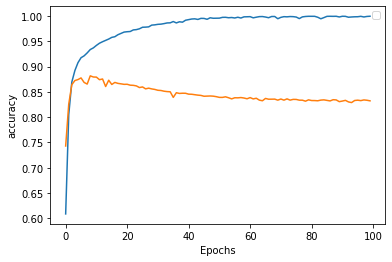

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

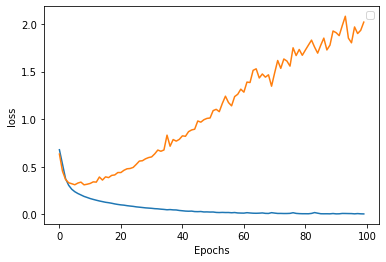

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend(string, 'val_' + string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')